In [61]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

In [31]:
# 1. Mean, Median
# Example Problem: A trader records his daily percent returns of his strategy over 7 days:
# 0.5%, -0.2%, 0.8%, 1.1$, -0.4%, 0.3%, 0.6%

returns = [0.5, -0.2, 0.8, 1.1, -0.4, 0.3, 0.6]

mean_return = np.mean(returns) # sum of all divided by the count
median_return = np.median(returns) # middle value when data is sorted

print(f"Mean Return {mean_return:.2f}%")
print(f"Median Return {median_return:.2f}%")

Mean Return 0.39%
Median Return 0.50%


In [32]:
# 2. Variance and Standard Deviation
# Example Problem: Using the same returns, calculate the Variance and Standard Deviation

variance = np.var(returns) # Sample Variance
SD = np.std(returns) # Sample Standard Deviation

print(f"Variance of returns: {variance:.4f}")
print(f"Standard Deviation of returns: {SD:.4f}")
print("The higher the standard deviation, the more volatile the strategy")

Variance of returns: 0.2441
Standard Deviation of returns: 0.4940
The higher the standard deviation, the more volatile the strategy


In [33]:
# 3. Covariance and Correlation
# Example Problem:
# Two trading strategies produce daily returns:
# A = [0.5, -0.2, 0.8, 1.1, -0.4, 0.3, 0.6]
# B = [0.4, -0.3, 0.7, 0.9, -0.5, 0.4, 0.7]
# Compute covariance and correlation between A and B.

A = np.array([0.5, -0.2, 0.8, 1.1, -0.4, 0.3, 0.6])
B = np.array([0.4, -0.3, 0.7, 0.9, -0.5, 0.4, 0.7])

cov_matrix = np.cov(A, B)
covariance = cov_matrix[0, 1]
correlation = np.corrcoef(A, B)[0, 1]

print(f"Covariance between A and B: {covariance:.4f}")
print(f"Correlation between A and B: {correlation:.4f}")
print("Correlation near +1 means they move together; near -1 means opposite movement.")

Covariance between A and B: 0.2771
Correlation between A and B: 0.9773
Correlation near +1 means they move together; near -1 means opposite movement.


In [45]:
# 4. Normal (Gaussian) Distribution
# Example Problem:
# Assume a trading strategy's daily PnL follows a normal distribution.
# With a mean = 0.5% and Standard Deviation = 1%
# What is the probability of losing money on a given day?

mean = 0.5
SD = 1

# Probability of return < 0
p_loss = norm.cdf(0, loc = mean, scale = SD)
print(f"The probability of losing money on a given day is: {p_loss:.2%}")

The probability of losing money on a given day is: 30.85%


In [49]:
# 5. Z-score 
# Example Problem
# A strategy makes 2% return in a day
# Mean = 0.5%, SD = 1%. Compute the z-score
#  Z = how far a value is from the mean

observed = 2
mean = 0.5
SD = 1

z = (observed - mean) / SD
print(f"Z-score of a 2% return is: {z:.2f}")
print()
print("A Z-score of 1.5 means that the mentioned return is 1.5 Standard Deviations above the mean")

Z-score of a 2% return is: 1.50

A Z-score of 1.5 means that the mentioned return is 1.5 Standard Deviations above the mean


In [59]:
# 6. CI's (Confidence Intervals)
# Example Problem:
# A trader has 100 daily trades with an average profit 2.5$ and SD 1.2%
# Compute the 95% Confidence Interval for the TRUE MEAN profit

n = 100 
mean_profit = 2.5
SD = 1.2
CI = 0.95

# t critical value
t_crit = stats.t.ppf((1 + CI) / 2, df=n-1)
margin_error = t_crit * SD / np.sqrt(n)

CI_lower = mean_profit - margin_error
CI_upper = mean_profit + margin_error

print(f"95% CI for mean profit per trade: ({CI_lower:.2f}$, {CI_upper:.2f}$)")
print("With 95% confidence, the range of the profit per trade will fall from 2.26$ to 2.74$")

95% CI for mean profit per trade: (2.26$, 2.74$)
With 95% confidence, the range of the profit per trade will fall from 2.26$ to 2.74$


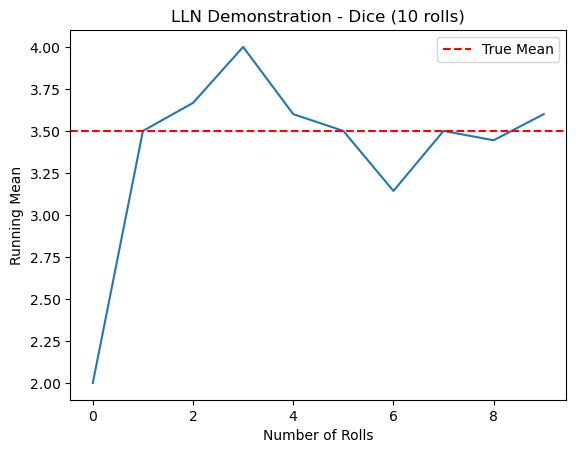

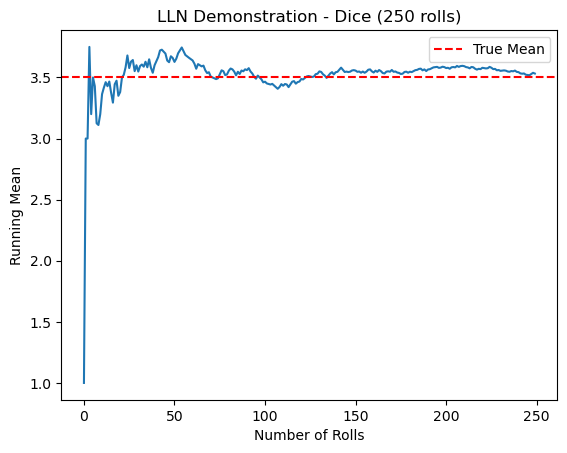

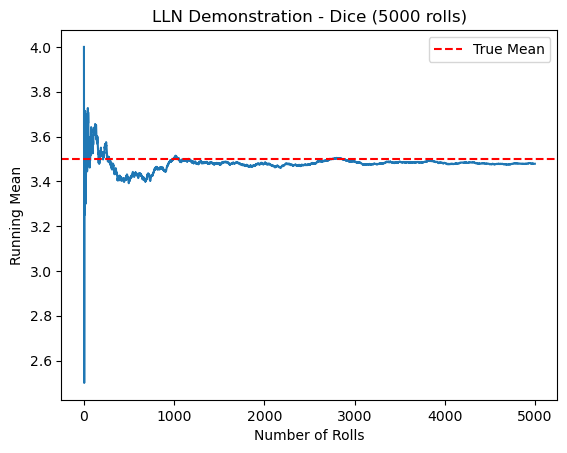

In [100]:
# 7. LLN (Law of Large Numbers)
# Example Problem: Simulate 10,000 rolls of a fair 6-sided die
# and plot how the running mean approaches the true mean (3.5)

def plot_lln_dice(n_rolls):
    dice_rolls = np.random.randint(1, 7, n_rolls) # 7 excluded 
    running_mean = np.cumsum(dice_rolls) / (np.arange(n_rolls) + 1)
    
    plt.plot(running_mean)
    plt.axhline(3.5, color='red', linestyle='--', label='True Mean')
    plt.xlabel('Number of Rolls')
    plt.ylabel('Running Mean')
    plt.title(f'LLN Demonstration - Dice ({n_rolls} rolls)')
    plt.legend()
    plt.show()


plot_lln_dice(10)
plot_lln_dice(250)
plot_lln_dice(5000)

# As the sample size increases, the running mean approaches the true mean 

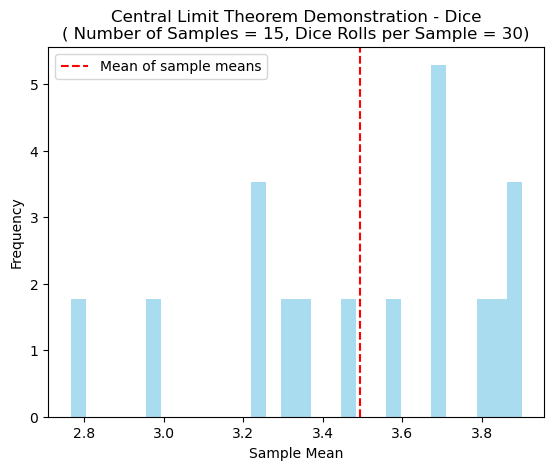

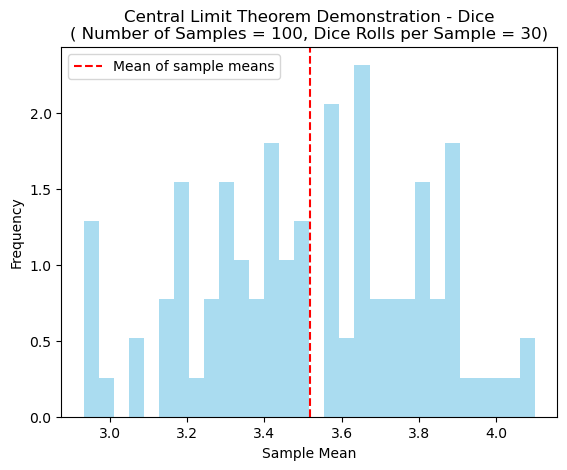

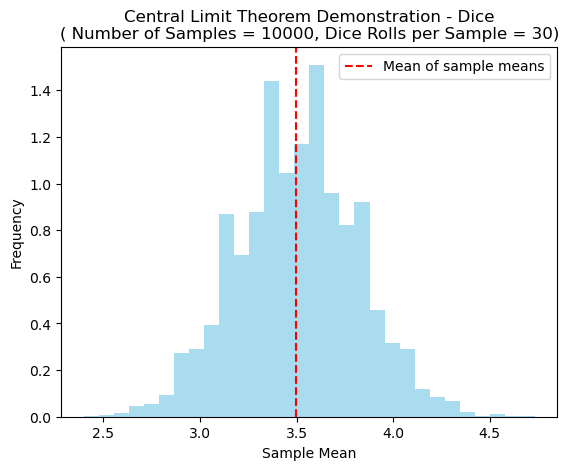

In [104]:
# CLT (Central Limit Theorem)
# Example: Sample means of 30 dice rolls repeated 1000 times

def plot_clt_dice(n_samples, sample_size):
    """
    Simulate the Central Limit Theorem for dice rolls.
    
    n_samples: number of repeated samples
    sample_size: size of each sample
    """
    all_means = []
    
    for _ in range(n_samples):
        sample = np.random.randint(1, 7, sample_size)  # dice roll
        all_means.append(np.mean(sample))
    
    plt.hist(all_means, bins=30, density=True, alpha=0.7, color='skyblue')
    plt.axvline(np.mean(all_means), color='red', linestyle='--', label='Mean of sample means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.title(f'Central Limit Theorem Demonstration - Dice\n( Number of Samples = {n_samples}, Dice Rolls per Sample = {sample_size})')
    plt.legend()
    plt.show()

# Example usage
plot_clt_dice(15, 30)
plot_clt_dice(100, 30)
plot_clt_dice(10000, 30)
# As the sample size increases, the distribution of the sample mean tends to form a "bell-shaped" (Normal or Gaussian) distribution, even if the underlying data was not normally distributed, as shown on the plots.